# Projet 1 (semaines 1 à 4) : Reversi 

## Semaine 1 : Prise en main, dénombrements

Le reversi (ou Othello) est un jeu combinatoire dont les règles sont très simples, disponibles sur wikipedia : https://fr.wikipedia.org/wiki/Othello_(jeu).
L'objectif de cette série de TMEs est d'étudier le jeu sous divers aspects probabilistes et de programmer quelques agents (heuristiques, probabilistes). 

Cette première séance est dédiée à la prise en main du jeu et à des dénombrements.

## Consignes générales pour les TMEs

Vous trouverez un fichier *reversi.py* qui contient une implémentation simple du jeu (et perfectible). Mettez le dans le même repertoire que votre notebook. 

Vous devez créer pour chaque tme un fichier **tmeX.py** (X le numéro du tme) dans lequel vous coderez les fonctions demandées. Le notebook ne doit servir qu'à l'affichage et à l'expérimentation.

Les TMEs sont à remettre sur le moodle du cours à chaque fin de séance. Vous soumettrez le notebook et le fichier **tmeX.py**, un rendu par binôme. N'oubliez pas de marquer les deux noms du binôme dans le rendu (de préférence dans le notebook et dans le fichier **tmeX.py**).

Il n'est pas attendu que le TME soit toujours entièrement terminé à la fin de la séance, ce rendu sert à suivre la progression des groupes.  Un TME dans le semestre sera choisi au hasard et noté (généreusement). Par contre, il est vivement conseillé d'avoir terminé le TME pour la séance suivante. 

Vous pouvez utiliser les lignes suivantes qui permettent de recharger votre fichier tmeX.py dans le notebook à chaque modification. 


In [13]:
%load_ext autoreload
%autoreload 2
from reversi import Reversi, play_game
import tme1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###  I - Prise en main du code fourni

Le moteur du jeu vous est fourni par le biais d'une classe **Reversi**. Le plateau est codé par un tableau **numpy** qui contient des 0 pour les cases vides, des 1 pour le premier joueur, des -1 pour le deuxième joueur. Les principales fonctions de cette classe sont : 
* Reversi(size=8) : le constructeur, avec en paramètre la taille du plateau
* valid_moves(player) : renvoie la liste des coups valides pour un joueur (player=1 ou -1)
* make_move(x,y,player) : le joueur joue en position (x,y) (player = 1 ou -1)
* game_over() : teste si le jeu est fini
* score() : renvoie le score 
* print_board() : affiche le plateau
* reset() : réinitialise le jeu
* nb_moves() : nombre de coups joués.

Ci-dessous un petit exemple de quelques coups. 

In [14]:
# Création du jeu
game = Reversi()
# Liste des coups valides pour le joueur 1
lst = game.valid_moves(1)
print("Le joueur 1 peut jouer les coups : ", lst)
# Le joueur 1 joue le coup (2,4)
game.make_move(2,4,1)
game.print_board()
# Liste des coups valides pour le joueur 2
lst = game.valid_moves(-1)
print("Le joueur 2 peut jouer les coups : ", lst)
# Le joueur 2 joue le coup (2,3)
game.make_move(2,3,-1)
game.print_board()
print("Le jeu est-il fini ? -> ",game.game_over()," Le score courant : ",game.score())
print("Nombre de coups joués : ", game.nb_moves())
# réinitialisation du jeu 
game.reset()
game.print_board()

Le joueur 1 peut jouer les coups :  [(2, 4), (3, 5), (4, 2), (5, 3)]
  0 1 2 3 4 5 6 7
0 . . . . . . . .
1 . . . . . . . .
2 . . . . O . . .
3 . . . O O . . .
4 . . . X O . . .
5 . . . . . . . .
6 . . . . . . . .
7 . . . . . . . .
Le joueur 2 peut jouer les coups :  [(2, 3), (2, 5), (4, 5)]
  0 1 2 3 4 5 6 7
0 . . . . . . . .
1 . . . . . . . .
2 . . . X O . . .
3 . . . X O . . .
4 . . . X O . . .
5 . . . . . . . .
6 . . . . . . . .
7 . . . . . . . .
Le jeu est-il fini ? ->  False  Le score courant :  0
Nombre de coups joués :  2
  0 1 2 3 4 5 6 7
0 . . . . . . . .
1 . . . . . . . .
2 . . . . . . . .
3 . . . O X . . .
4 . . . X O . . .
5 . . . . . . . .
6 . . . . . . . .
7 . . . . . . . .


#### I-1 Joueur aléatoire
Ecrivez une classe **AgentRandom** qui implémente un joueur aléatoire avec :
* un constructeur qui prend un paramètre :  **board**, le jeu auquel il est attaché.
* une méthode **play(player)** qui prend en paramètre 1 ou -1 selon que ce soit le tour du premier ou du deuxième joueur de jouer et renvoie un coup choisi uniformément aléatoirement dans la liste des coups disponibles, ou (-1,-1) si aucun coup n'est possible.

La fonction **play_game(board,player_1,player_2,display=False)** fournie dans **reversi** vous permet avec les lignes suivantes de tester votre agent.

Faites une expérience qui tente de montrer si en jouant au hasard il y a un avantage à jouer en premier. 

En utilisant **matplotlib.pyplot** ou **seaborn**, tracez l'histogramme des scores obtenus.

In [26]:
board = Reversi()
player_1 = tme1.AgentRandom(board)
player_2 = tme1.AgentRandom(board)
#Mettre à True ou False display pour afficher ou non la partie
score = play_game(board,player_1,player_2,display=False)
print("Le score de la partie est : ", score)

Le score de la partie est :  14


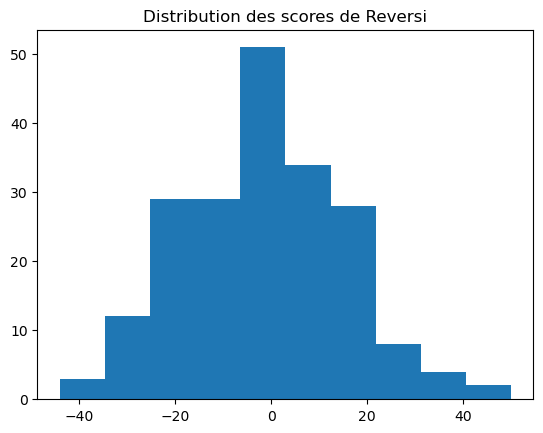

In [27]:
import matplotlib.pyplot as plt 

scores = []

for i in range(200) :
    board = Reversi()
    player_1 = tme1.AgentRandom(board)
    player_2 = tme1.AgentRandom(board)
    score = play_game(board,player_1,player_2,display=False)
    scores.append(score)

plt.hist(scores)
plt.title("Distribution des scores de Reversi")
plt.show()

### II - Dénombrements

Nous voulons dans cette partie réaliser un certain nombre de dénombrements sur le nombre de coups possibles, le nombre de configurations du plateau possibles, etc. Il n'est pas possible de calculer de manière analytique ces quantités - du fait de la complexité du jeu - nous allons donc procéder de manière algorithmique. Nous avons besoin de comparer efficacement deux plateaux (savoir s'ils sont identiques ou non) mais également de pouvoir stocker efficacement des configurations. Pour cela, nous allons utiliser une fonction de hashage qui transforme la configuration d'un plateau en 2 entiers. Chaque entier représente la position des pions d'un des deux joueurs de la manière suivante : l'entier a autant de bits que de cases sur le plateau (sur un plateau 8x8, 64 bits), chaque bit représente une case du plateau; il est à 1 si un pion est présent, 0 sinon. La fonction **board_to_int()** de la classe **Reversi** implémente cette fonction de hashage et la fonction **bitboards_to_board(player1,player2)** permet de décoder deux entiers pour les retranscrire en une position du plateau. 

De cette manière, il est possible de stocker la configuration d'un plateau dans un ensemble (**set** en python) ou - comme clé d'un dictionnaire, utile pour le comptage - sous la forme d'un couple de deux entiers et donc de garder trace des configurations déjà rencontrées. 


#### II - 1 Dénombrement approché du nombre de coups possibles


Pour approcher un résultat lorsque le dénombrement exact n'est pas possible, on utilise souvent une approche Monte-Carlo, c'est-à-dire on échantillone aléatoirement un grand nombre de simulations et on estime par moyennage ainsi la grandeur combinatoire qui nous intéresse.


Implémentez une fonction **count_moves_mc(nb,size,nb_simu)** qui permet de compter de manière approximative le nombre de mouvements possibles à chaque coup jusqu'au **nb**-ème coup sur un plateau de taille **size** en utilisant **nb_simu** simulations aléatoires. Pour cela, vous executerez **nb_simu** en jouant avec les agents aléatoires et à chaque coup joué, vous stockerez le nombre de coups possibles à l'aide d'un dictionnaire par exemple où une clé $i$ correspond au $i$-ème$ coup et la valeur correspond à la liste des nombre de coups possibles. Vous obtiendrez le résultat voulu en moyennant pour chaque clé la liste des nombre de coups possibles (vous pouvez également utilisé une structure **defaultdict** dans le module **collections**).


In [104]:
from collections import defaultdict

def count_moves_mc(nb,size,nb_simu):

    game=Reversi(size)
    moves = defaultdict(list)
    agent = AgentRandom(game)

    for i in range(nb_simu):
        
    
    """game = Reversi(size=8)
    player1 = tme1.AgentRandom(game)
    player2 =  tme1.AgentRandom(game)
    d = defaultdict(int)
    for i in range(nb_simu):
        for j in range(nb) :
            if j%2 ==0: 
                lst1 = game.valid_moves(1)
                d[j] += len(lst1)
                x,y= player1.play(1)
                game.make_move(x,y,1)
                
            else :
                lst2 = game.valid_moves(-1)
                d[j] += len(lst2)
                x,y= player2.play(-1)
                game.make_move(x,y,-1)
                
    moyenne = sum(d.values()) / (len(d)*nb_simu)
    return moyenne"""

In [106]:
n = count_moves_mc(20,8,100)
print(n)

24.85


#### II - 2 Dénombrement approché du nombre de configurations 

En ne comptant pas les symétries, calculez à la main combien de configurations distinctes il est possible d'obtenir après deux coups.

Implémentez une fonction **count_config_mc(nb,size,nb_simu)** qui permet de compter de manière approximative le nombre de configurations possibles au $i$-ème coup jusqu'à **nb** coups sur des plateaux de taille **size** en utilisant **nb_simu** simulations aléatoires. Pour cela, vous utiliserez le même principe que précédemment : vous jouerez des parties aléatoires et vous stockerez dans une ensemble (**set**) les configurations rencontrées. A la fin, il suffira de compter le nombre de configurations (elles sont distinctes car stockées dans un ensemble) pour chaque numéro de coups. 

Observez la courbe du nombre de configurations possibles entre 1 et 8 coups. 

#### II - 3 Dénombrement exact du nombre de coups possibles

Implémentez une fonction **count_moves(nb,size)** qui permet de compter le nombre exact de coups possibles jusqu'au **nb**-ème coup sur un plateau de taille **size**. Pour cela, vous pouvez faire un parcours en largeur de l'arbre des possibilités. Une liste permet de stocker les configurations rencontrées (et quel joueur doit jouer au prochain coup). Initialement, cette liste contient uniquement le couple  **(plateau de départ, joueur 1)**. Pour tous les coups possibles, on ajoute dans la liste les couples constitués des configurations obtenues après chaque coup et **joueur 2**. Une boucle permet de dépiler la liste tant que celle-ci n'est pas vide. Une configuration qui a atteint les **nb** coups ou qui n'est plus jouable n'est plus considérée (les positions suivantes ne sont pas ajoutées à la liste). 

Comparez les résultats à  ceux de la méthode approchée. Jusqu'à quel coup est-il possible d'effectuer le calcul ? 


#### II - 4 Dénombrement exact du nombre de configurations 



Implémentez une fonction **count_config(nb,size)** qui permet de compter le nombre exact de configurations possibles après **nb** coups sur des plateaux de taille **size**. Comparer les résultats avec l'approximation Monte-Carlo. Jusqu'à quelle nombre de coups peut-on calculer raisonablement de manière exacte ? Est-ce que la simulation Monte-Carlo est satisfaisante ? Quelle limite ?



#### II - 5 Dénombrement du nombre de configuration finales

Théoriquement, sans prendre en compte la faisabilité, quelle est le nombre de configurations finales (fin du jeu) possibles pour un tableau d'une taille donnée ?

En utilisant vos précédents algorithmes, étudier le nombre exact de configurations finales  possibles pour une taille de plateau de 4. 

Essayer d'estimer pour des tailles de plateau supérieures (5 par exemple) avec l'approche Monte-Carlo.

Au vue de ces résultats, peut-on utiliser un algorithme de résolution exact du jeu ?

### Bonus : Optimisation de la complexité

Vos algorithmes sont lents pour deux raisons : il y a d'une part trop d'appels à **valid_moves** et par ailleurs la structure de tableau utilisée n'est pas du tout adéquate pour les calculs combinatoires.

#### Bonus 1  (conseillé)
Modifiez le code fourni pour ne faire qu'un appel à **valid_moves** lors d'un tour de jeu (en stockant par exemple les coups valides). Vous pouvez également penser à d'autres optimisation (comment change la liste des coups possibles lorsqu'un coup est joué ?).

#### Bonus 2 (difficile):
Pour accélerer grandement la complexité, vous pouvez utiliser  une structure de type **bitboard** (https://fr.wikipedia.org/wiki/Bitboard). Vous pouvez vous référer à cette article : https://www.researchgate.net/publication/279031895_Bitboard_Methods_for_Games  ou à d'autres ressources sur internet. L'objectif d'une structure bitboard est de calculer les coups possibles et les changements du plateau après un coup uniquement avec des opérations sur les bits des entiers représentants les positions (avec des opérations binaires sur les bits telles que **xor**, **and**, **or**, **~**, **shift (décalage de bits). Par exemple, toutes les cases vides peuvent être obtenues avec l'opération **~(player1 or player2)**, le décalage de la position d'un joueur vers la droite peut être obtenu par l'opération **shift(player,1)**, etc.
